## **Concepts and Technologies of AI**

3.1 Problem - 1:  Getting Started with Data Exploration -
Some Warm up

Exercises:

1. Data Exploration and Understanding:

• Dataset Overview:

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset (update 'your_dataset.csv' to the actual file path)
dataset = pd.read_csv('/content/drive/MyDrive/Assignment2/WHR-2024-5CS037.csv')

# 1. Display the first 10 rows
print("First 10 rows of the dataset:")
print(dataset.head(10))

# 2. Identify the number of rows and columns in the dataset
rows, columns = dataset.shape
print("\nNumber of rows:", rows)
print("Number of columns:", columns)

# 3. List all the columns and their data types
print("\nColumns and their data types:")
print(dataset.dtypes)


First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

• Basic Statistics:

In [6]:
# Calculate basic statistics for the "Score" column
mean_score = dataset['score'].mean()
median_score = dataset['score'].median()
std_dev_score = dataset['score'].std()

print(f"Mean of the Score column: {mean_score}")
print(f"Median of the Score column: {median_score}")
print(f"Standard Deviation of the Score column: {std_dev_score}")

# Identify the country with the highest and lowest happiness scores
highest_score_country = dataset.loc[dataset['score'].idxmax(), 'Country name']
lowest_score_country = dataset.loc[dataset['score'].idxmin(), 'Country name']

highest_score = dataset['score'].max()
lowest_score = dataset['score'].min()

print(f"\nCountry with the highest happiness score: {highest_score_country} ({highest_score})")
print(f"Country with the lowest happiness score: {lowest_score_country} ({lowest_score})")


Mean of the Score column: 5.52758041958042
Median of the Score column: 5.785
Standard Deviation of the Score column: 1.1707165099442995

Country with the highest happiness score: Finland (7.741)
Country with the lowest happiness score: Afghanistan (1.721)


• Missing Values:

In [7]:
# Check for missing values in the dataset
missing_values = dataset.isnull().sum()

# Display total missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:

In [8]:
# 1. Filter the dataset to show only countries with a score greater than 7.5
filtered_dataset = dataset[dataset['score'] > 7.5]

print("Countries with a Score greater than 7.5:")
print(filtered_dataset)

# 2. Sort the filtered dataset by "Log GDP per capita" in descending order
sorted_dataset = filtered_dataset.sort_values(by='Log GDP per capita', ascending=False)

# Display the top 10 rows of the sorted dataset
print("\nTop 10 countries sorted by GDP per Capita (descending order):")
print(sorted_dataset.head(10))


Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  

Top 10 countries sorted by GDP per Capita (descending order):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525           

• Adding New Columns:

In [9]:
# Create a new column 'Happiness Category' based on the 'score' column
def categorize_happiness(score):
    if score > 7:
        return 'High'
    elif score >= 5:
        return 'Medium'
    else:
        return 'Low'

dataset['Happiness Category'] = dataset['score'].apply(categorize_happiness)

# Display the updated dataset with the new column
print("Dataset with the new 'Happiness Category' column:")
print(dataset.head(10))  # Display the first 10 rows to verify


Dataset with the new 'Happiness Category' column:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819      

2.	Data Visualizations:

Bar Plot

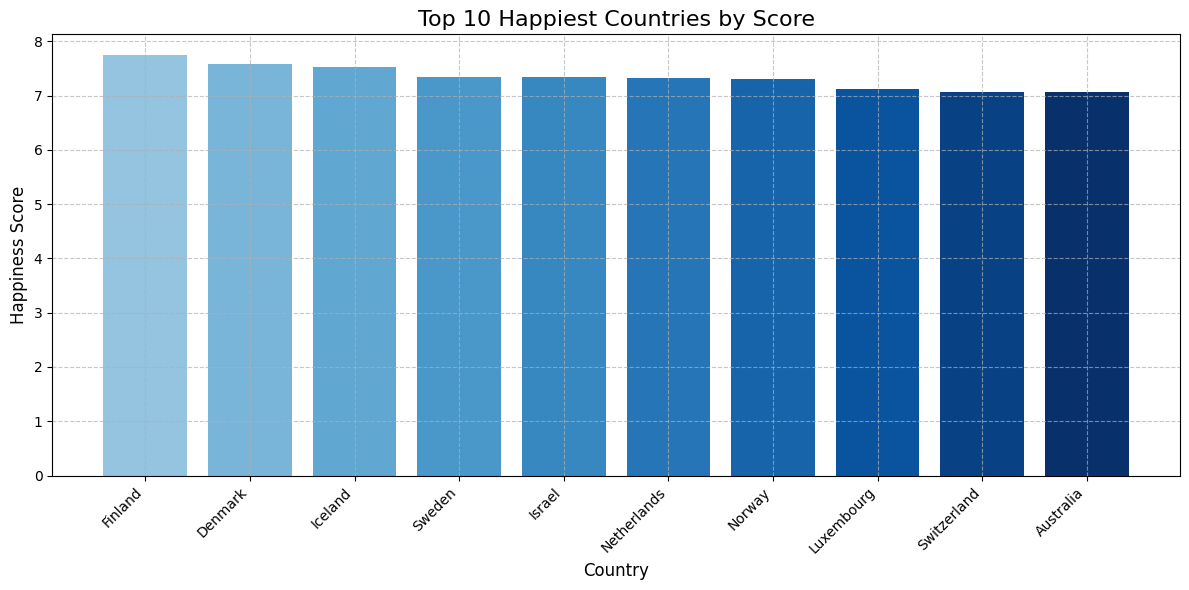

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Strip any leading/trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

# Sort the dataset by 'score' in descending order and get the top 10 happiest countries
top_10_happiest = dataset.nlargest(10, 'score')

# Generate an array of colors from the 'Blues' colormap
colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_10_happiest)))  # Adjust range for color intensity

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color=colors)

# Adding title and labels
plt.title('Top 10 Happiest Countries by Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Line Graph


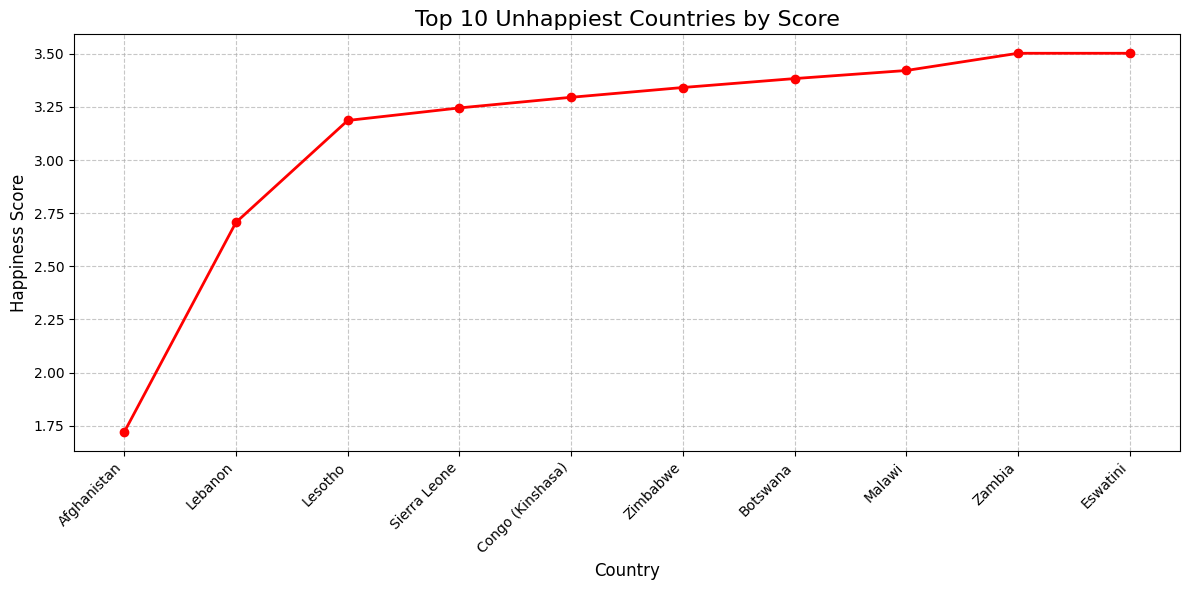

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Strip leading/trailing spaces from column names and categorize happiness
dataset.columns = dataset.columns.str.strip()
dataset['Happiness Category'] = dataset['score'].apply(lambda score: 'High' if score > 7 else 'Medium' if score >= 5 else 'Low')

# Get the top 10 unhappiest countries (Low happiness category) and sort by score in ascending order
unhappiest_10 = dataset[dataset['Happiness Category'] == 'Low'].nsmallest(10, 'score')

# Plot if there are any 'Low' happiness scores
if not unhappiest_10.empty:
    plt.figure(figsize=(12, 6))

    # Generate a line plot with the unhappiest countries
    plt.plot(unhappiest_10['Country name'], unhappiest_10['score'], marker='o', color='red', linestyle='-', linewidth=2)

    # Adding titles and labels
    plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add grid and styling
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No 'Low' happiness scores found.")


Histogram

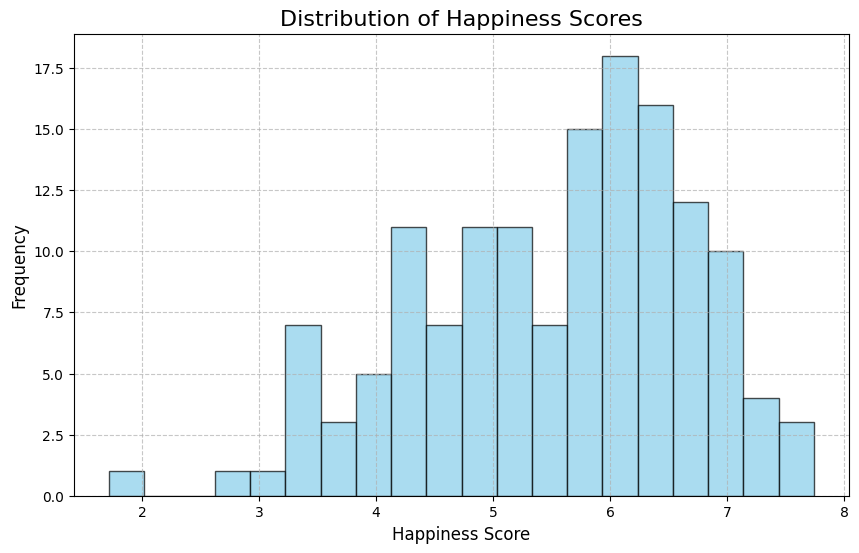

In [29]:

# Strip any leading/trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

# Plotting the histogram for the 'score' column
plt.figure(figsize=(10, 6))
plt.hist(dataset['score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


Scatter Plot

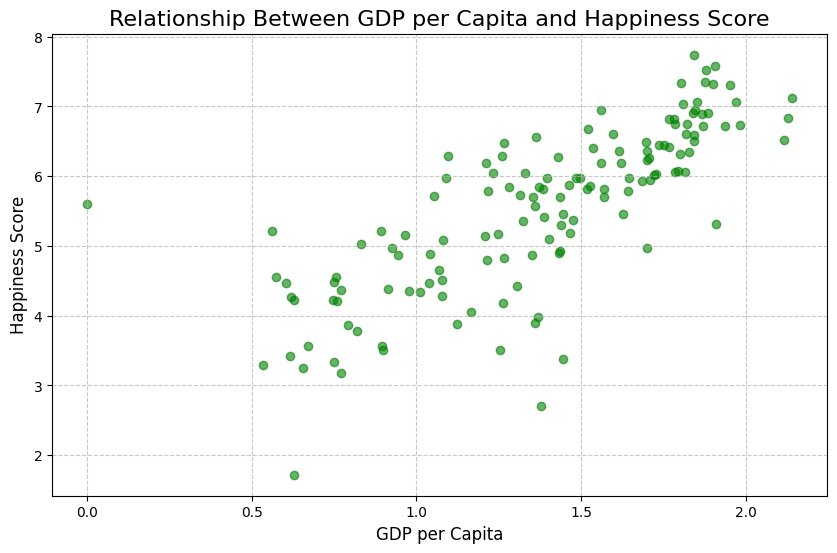

In [30]:

# Strip any leading/trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

# Plotting the scatter plot between GDP per Capita and Score
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Log GDP per capita'], dataset['score'], color='green', alpha=0.6)

# Adding title and labels
plt.title('Relationship Between GDP per Capita and Happiness Score', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Display the grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


3.2	     Problem - 2 -   Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:


In [38]:


# Step 1: Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Step 2: Filter the dataset to include only South Asian countries
dataset.columns = dataset.columns.str.strip()

# Filter the dataset based on the 'Country name' being in the South Asian list
south_asia_dataset = dataset[dataset['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataframe as a CSV file
south_asia_dataset.to_csv('south_asia_happiness_data.csv', index=False)

# Optionally, print the first few rows to verify
print(south_asia_dataset.head())


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

Task 2 - Composite Score Ranking : Tasks

In [42]:
#Step 1
# Using .loc[] to safely assign the 'Composite Score' column to avoid SettingWithCopyWarning
south_asia_dataset.loc[:, 'Composite Score'] = (0.40 * south_asia_dataset['Log GDP per capita'] +
                                                0.30 * south_asia_dataset['Social support'] +
                                                0.30 * south_asia_dataset['Healthy life expectancy'])

# Display the first few rows to verify the new column
print(south_asia_dataset[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Composite Score']].head())


    Country name  Log GDP per capita  Social support  Healthy life expectancy  \
92         Nepal               0.965           0.990                    0.443   
107     Pakistan               1.069           0.600                    0.321   
125        India               1.166           0.653                    0.417   
127    Sri Lanka               1.361           1.179                    0.586   
128   Bangladesh               1.122           0.249                    0.513   

     Composite Score  
92            0.8159  
107           0.7039  
125           0.7874  
127           1.0739  
128           0.6774  


In [44]:
#Step 2
# Use .loc[] to safely assign the 'Composite Rank' column
south_asia_dataset.loc[:, 'Composite Rank'] = south_asia_dataset['Composite Score'].rank(ascending=False, method='dense')

# Sort the dataset based on the Composite Score in descending order to visualize the ranking
south_asia_sorted = south_asia_dataset.sort_values(by='Composite Score', ascending=False)

# Display the top 10 countries with their composite score and rank
print(south_asia_sorted[['Country name', 'Composite Score', 'Composite Rank']].head(10))


    Country name  Composite Score  Composite Rank
127    Sri Lanka           1.0739             1.0
92         Nepal           0.8159             2.0
125        India           0.7874             3.0
107     Pakistan           0.7039             4.0
128   Bangladesh           0.6774             5.0
142  Afghanistan           0.3238             6.0


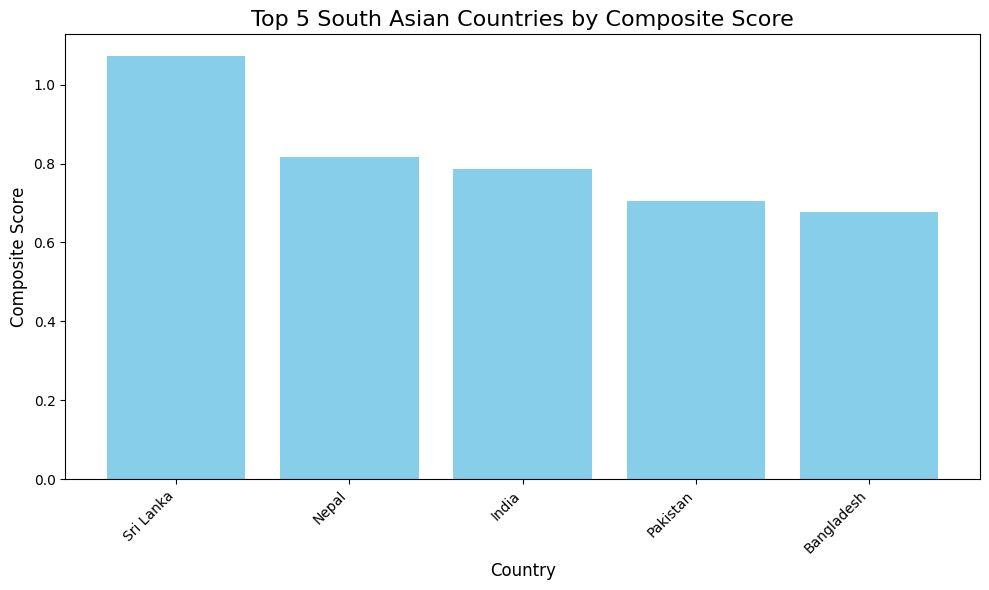

In [46]:
# Step 3
# Sort the DataFrame by 'Composite Score' in descending order and select the top 5 countries
top_5_south_asia = south_asia_dataset.sort_values(by='Composite Score', ascending=False).head(5)

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_south_asia['Country name'], top_5_south_asia['Composite Score'], color='skyblue')

# Adding title and labels
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Composite Score', fontsize=12)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


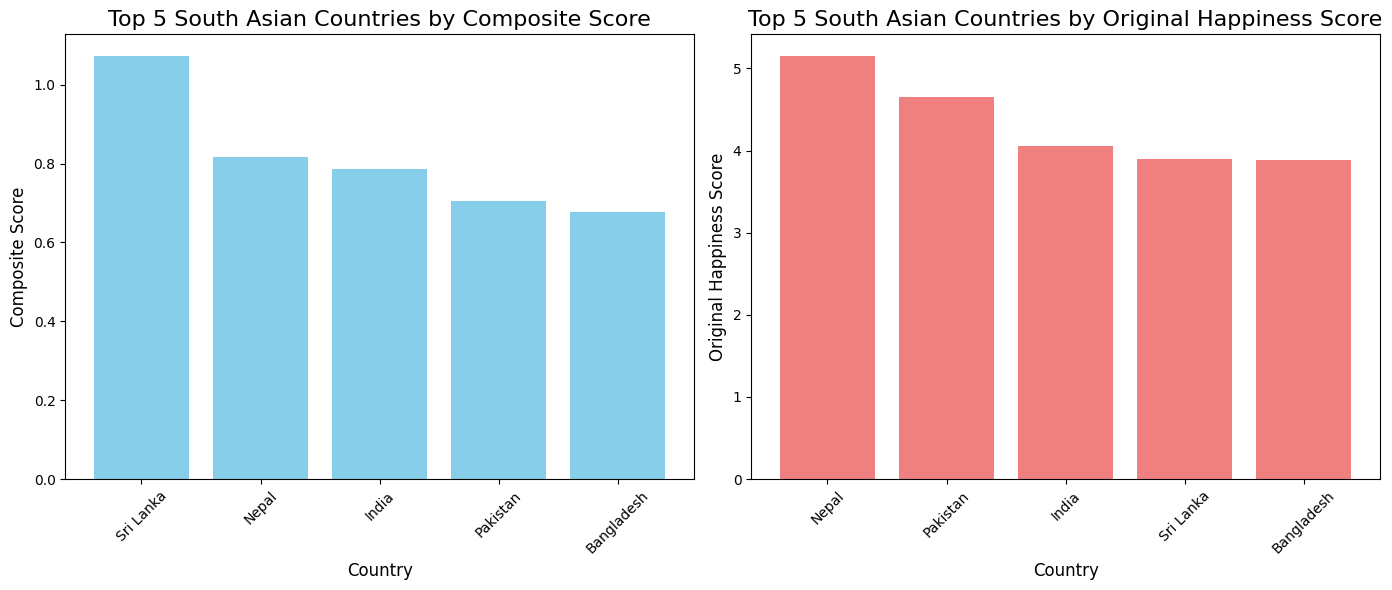

In [47]:
# Step 4
# Sort the South Asia dataset based on the Composite Score and the original Score (Happiness Score)
top_south_asia_composite = south_asia_dataset.sort_values(by='Composite Score', ascending=False).head(5)
top_south_asia_original = south_asia_dataset.sort_values(by='score', ascending=False).head(5)

# Create a side-by-side bar chart to compare the Composite Score and the original Score
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Composite Score
ax[0].bar(top_south_asia_composite['Country name'], top_south_asia_composite['Composite Score'], color='skyblue')
ax[0].set_title('Top 5 South Asian Countries by Composite Score', fontsize=16)
ax[0].set_xlabel('Country', fontsize=12)
ax[0].set_ylabel('Composite Score', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

# Plot Original Score
ax[1].bar(top_south_asia_original['Country name'], top_south_asia_original['score'], color='lightcoral')
ax[1].set_title('Top 5 South Asian Countries by Original Happiness Score', fontsize=16)
ax[1].set_xlabel('Country', fontsize=12)
ax[1].set_ylabel('Original Happiness Score', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Task - 3 - Outlier Detection: Tasks:

Outlier Countries Based on Score:
    Country name  score
142  Afghanistan  1.721

Outlier Countries Based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


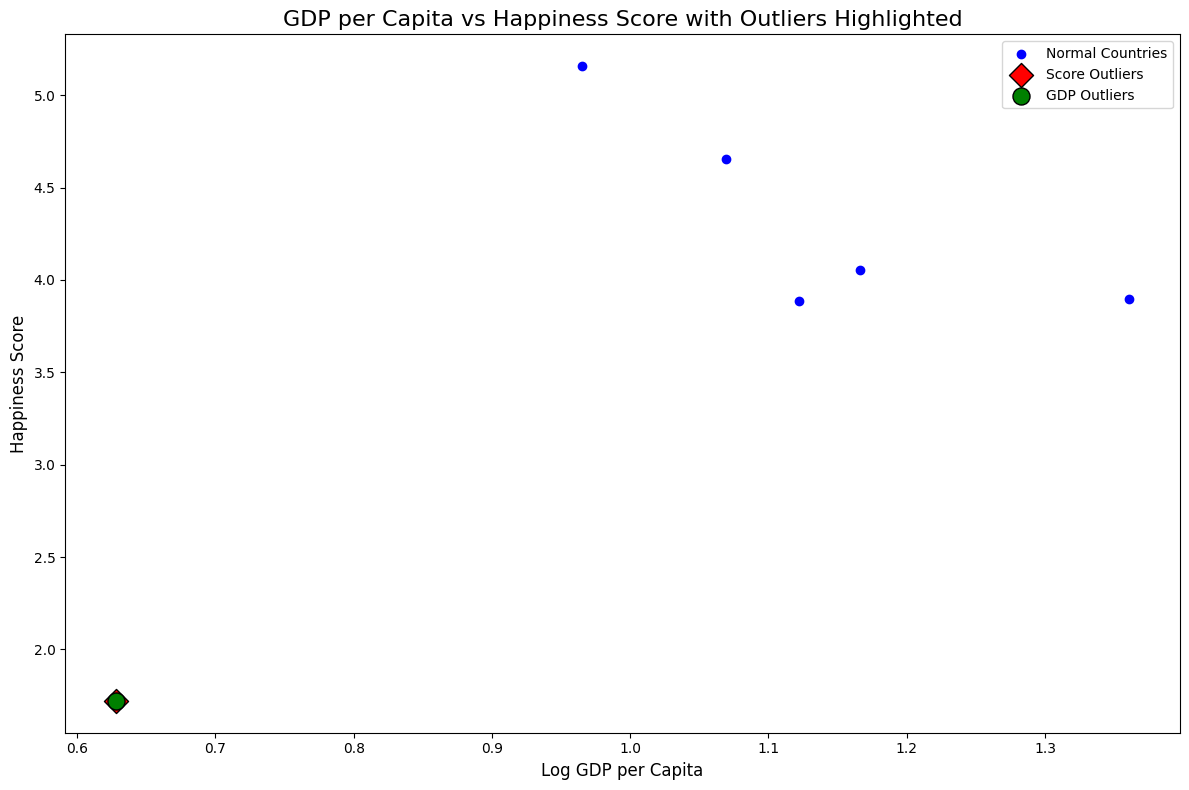

In [55]:

# Calculate IQR for Score and Log GDP per capita
Q1_score = south_asia_dataset['score'].quantile(0.25)
Q3_score = south_asia_dataset['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_dataset['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_dataset['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define the outlier thresholds based on 1.5 * IQR
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outlier countries for Score and GDP per Capita using the IQR method
outliers_score = south_asia_dataset[(south_asia_dataset['score'] < lower_bound_score) |
                                    (south_asia_dataset['score'] > upper_bound_score)]

outliers_gdp = south_asia_dataset[(south_asia_dataset['Log GDP per capita'] < lower_bound_gdp) |
                                  (south_asia_dataset['Log GDP per capita'] > upper_bound_gdp)]

# Display the outliers for inspection
print("Outlier Countries Based on Score:")
print(outliers_score[['Country name', 'score']])

print("\nOutlier Countries Based on GDP per Capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])

# Visualizing the outliers with a scatter plot
plt.figure(figsize=(12, 8))

# Plot GDP per Capita vs Score for normal countries (in blue)
plt.scatter(south_asia_dataset['Log GDP per capita'], south_asia_dataset['score'], color='blue', label='Normal Countries')

# Highlight outliers based on Score (in red) and GDP per Capita (in green) with larger markers
plt.scatter(outliers_score['Log GDP per capita'], outliers_score['score'], color='red', label='Score Outliers', s=150, marker='D', edgecolor='black')
plt.scatter(outliers_gdp['Log GDP per capita'], outliers_gdp['score'], color='green', label='GDP Outliers', s=150, marker='o', edgecolor='black')

# Adding title and labels
plt.title('GDP per Capita vs Happiness Score with Outliers Highlighted', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Task 4 - Exploring Trends Across Metrics : Tasks:

In [56]:
import pandas as pd
from scipy.stats import pearsonr

# Replace these names with the actual columns for the two chosen metrics
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'
score_column = 'score'

# Calculate the Pearson correlation coefficient between the chosen metrics and the Score
corr_metric_1, _ = pearsonr(south_asia_dataset[metric_1], south_asia_dataset[score_column])
corr_metric_2, _ = pearsonr(south_asia_dataset[metric_2], south_asia_dataset[score_column])

# Print the correlation results
print(f"Pearson correlation between {metric_1} and Happiness Score: {corr_metric_1}")
print(f"Pearson correlation between {metric_2} and Happiness Score: {corr_metric_2}")


Pearson correlation between Freedom to make life choices and Happiness Score: 0.8005185224163316
Pearson correlation between Generosity and Happiness Score: 0.874512371253192


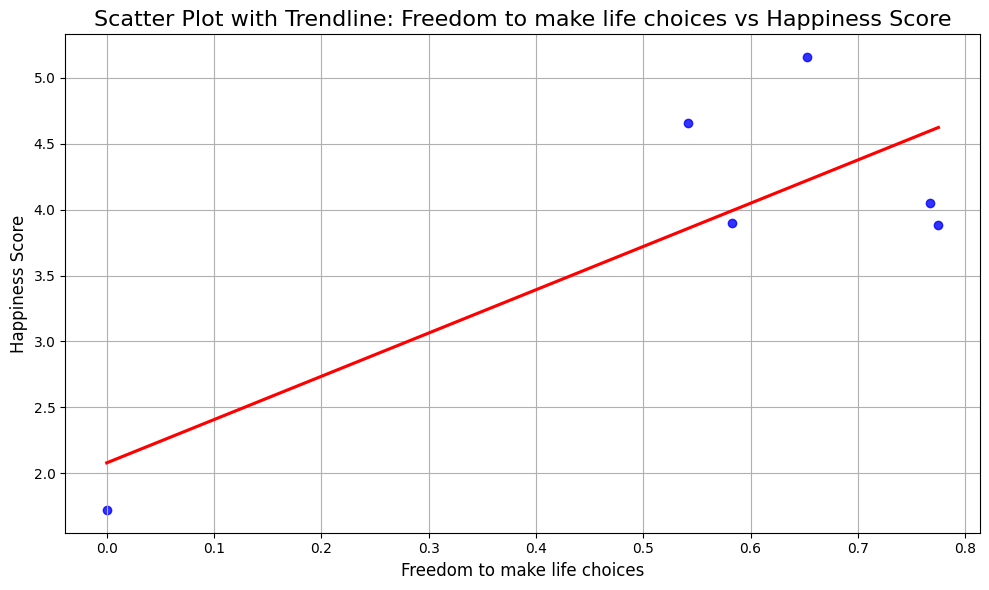

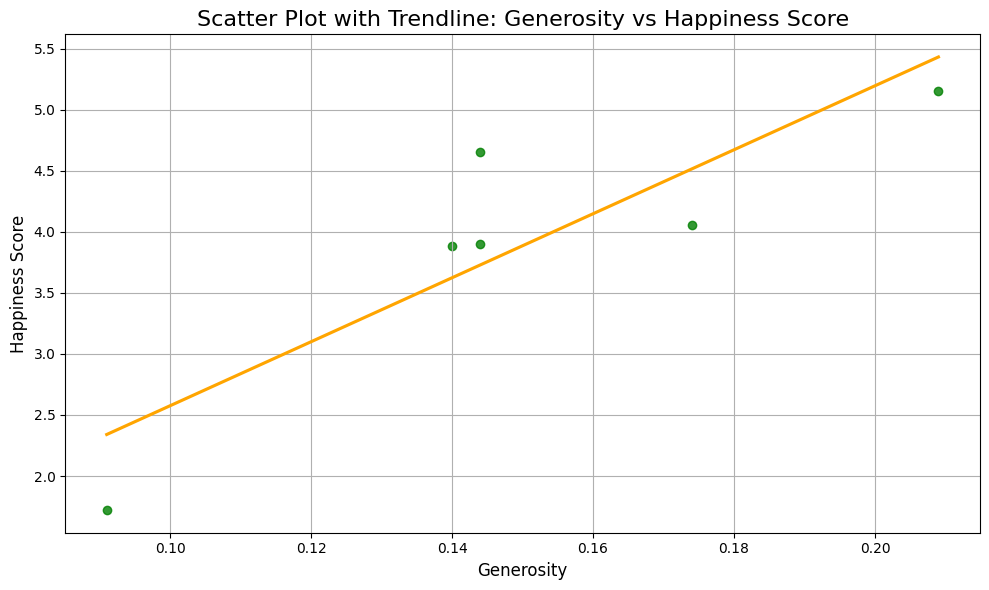

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these names with the actual columns for the two chosen metrics
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'
score_column = 'score'

# Plotting Scatter Plot for "Freedom to Make Life Choices" vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x=south_asia_dataset[metric_1], y=south_asia_dataset[score_column],
            scatter_kws={'color':'blue'}, line_kws={'color':'red'}, ci=None)

plt.title(f'Scatter Plot with Trendline: {metric_1} vs Happiness Score', fontsize=16)
plt.xlabel(f'{metric_1}', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Scatter Plot for "Generosity" vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x=south_asia_dataset[metric_2], y=south_asia_dataset[score_column],
            scatter_kws={'color':'green'}, line_kws={'color':'orange'}, ci=None)

plt.title(f'Scatter Plot with Trendline: {metric_2} vs Happiness Score', fontsize=16)
plt.xlabel(f'{metric_2}', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
# Calculate Pearson correlation for Freedom to Make Life Choices vs Score
correlation_freedom = south_asia_dataset[metric_1].corr(south_asia_dataset[score_column])

# Calculate Pearson correlation for Generosity vs Score
correlation_generosity = south_asia_dataset[metric_2].corr(south_asia_dataset[score_column])

print(f'Pearson correlation between {metric_1} and Happiness Score: {correlation_freedom:.2f}')
print(f'Pearson correlation between {metric_2} and Happiness Score: {correlation_generosity:.2f}')


Pearson correlation between Freedom to make life choices and Happiness Score: 0.80
Pearson correlation between Generosity and Happiness Score: 0.87


Question number 3

Generosity (0.87) has the strongest relationship with the Happiness Score. A correlation of 0.87 suggests that generosity is strongly associated with higher happiness in South Asia, meaning that countries with more generosity tend to have higher happiness scores.

Freedom to make life choices (0.80), while still significant, has a slightly weaker relationship with the Happiness Score compared to Generosity. However, a correlation of 0.80 still indicates a strong positive association, suggesting that more freedom tends to correlate with higher happiness, but the effect is not as pronounced as generosity.

Task - 5 - Gap Analysis:

Tasks:

In [62]:
# Step 1: Calculate the GDP-Score Gap and use .loc to avoid SettingWithCopyWarning
south_asia_dataset.loc[:, 'GDP-Score Gap'] = south_asia_dataset['Log GDP per capita'] - south_asia_dataset['score']

# Display the first few rows to verify the new column
print(south_asia_dataset[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head())


    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764


In [63]:
#Step 2: Rank the countries by 'GDP-Score Gap' in descending order (highest gap first)
ranked_descending = south_asia_dataset.sort_values(by='GDP-Score Gap', ascending=False)

# Rank the countries by 'GDP-Score Gap' in ascending order (lowest gap first)
ranked_ascending = south_asia_dataset.sort_values(by='GDP-Score Gap', ascending=True)

# Display the rankings
print("Ranked by GDP-Score Gap (Descending):")
print(ranked_descending[['Country name', 'GDP-Score Gap']].head())  # Display the top 5 countries

print("\nRanked by GDP-Score Gap (Ascending):")
print(ranked_ascending[['Country name', 'GDP-Score Gap']].head())  # Display the top 5 countries


Ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588

Ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537


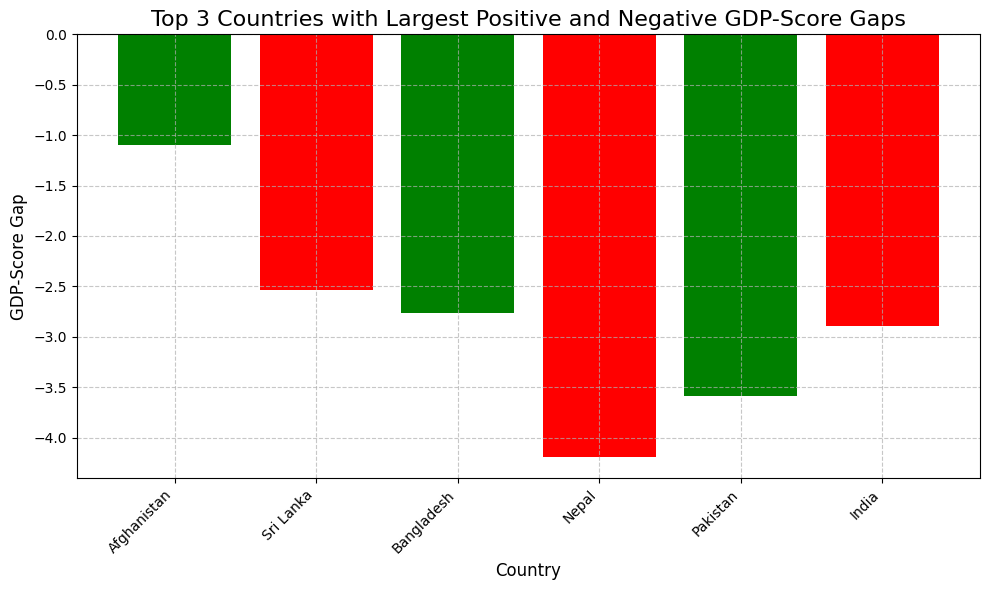

In [67]:
# Get the top 3 countries with the largest positive and negative gaps
top_3_positive = south_asia_dataset.nlargest(3, 'GDP-Score Gap')
top_3_negative = south_asia_dataset.nsmallest(3, 'GDP-Score Gap')

# Combine the top positive and negative gaps into one DataFrame
highlighted_countries = pd.concat([top_3_positive, top_3_negative])

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(highlighted_countries['Country name'], highlighted_countries['GDP-Score Gap'], color=['green', 'red', 'green', 'red', 'green', 'red'])

# Adding title and labels
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)

# Display the grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


The GDP-Score Gap highlights the difference between a country's economic output (GDP per capita) and its happiness score. Countries like Sri Lanka and Bangladesh have positive gaps, suggesting they have higher GDPs but struggle to translate this into happiness due to factors like inequality, political instability, or insufficient social services. Conversely, Nepal, Pakistan, and India have negative gaps, indicating higher happiness than expected from their GDP, likely due to strong social support, community networks, and non-material factors. These insights emphasize the need for balanced economic growth and policies that improve both material and emotional well-being.

3.3	Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset: Tasks:

1.	Descriptive Statistics:

In [68]:
# List of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                         "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter Middle East countries from the dataset
middle_east_dataset = dataset[dataset['Country name'].isin(middle_east_countries)]

# Calculate descriptive statistics for South Asia
south_asia_score_mean = south_asia_dataset['score'].mean()
south_asia_score_std = south_asia_dataset['score'].std()

# Calculate descriptive statistics for Middle East
middle_east_score_mean = middle_east_dataset['score'].mean()
middle_east_score_std = middle_east_dataset['score'].std()

# Print results
print(f"South Asia - Mean: {south_asia_score_mean}, Standard Deviation: {south_asia_score_std}")
print(f"Middle East - Mean: {middle_east_score_mean}, Standard Deviation: {middle_east_score_std}")

# Comparison
if south_asia_score_mean > middle_east_score_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")


South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has a higher average happiness score.


2.	Top and Bottom Performers:

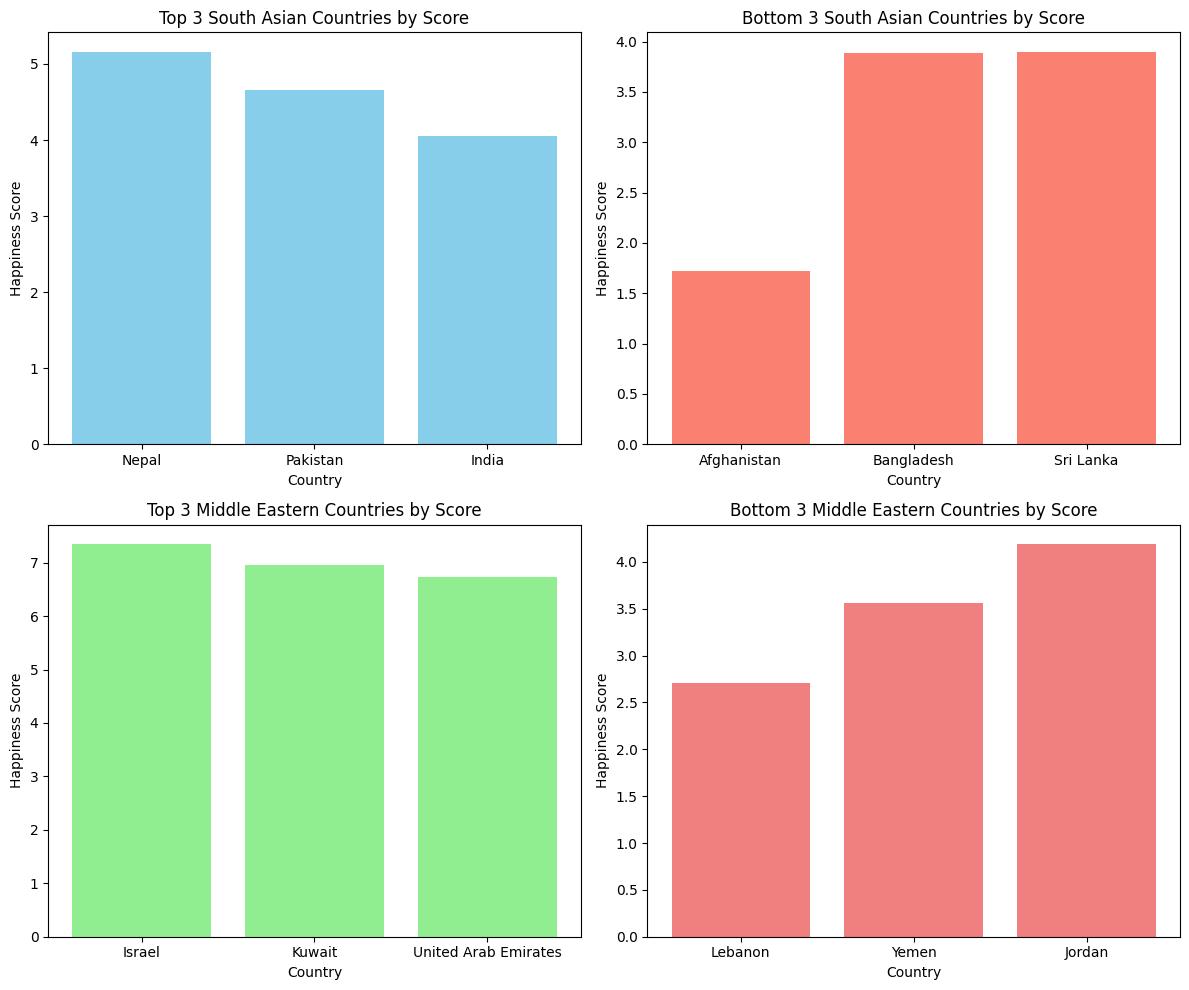

In [70]:
import matplotlib.pyplot as plt

# 1. Identify top 3 and bottom 3 countries in South Asia based on the score
top_3_south_asia = south_asia_dataset.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_south_asia = south_asia_dataset.nsmallest(3, 'score')[['Country name', 'score']]

# 2. Identify top 3 and bottom 3 countries in the Middle East based on the score
top_3_middle_east = middle_east_dataset.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_middle_east = middle_east_dataset.nsmallest(3, 'score')[['Country name', 'score']]

# 3. Plotting the bar charts (vertical bars)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart for Top 3 South Asian countries
axes[0, 0].bar(top_3_south_asia['Country name'], top_3_south_asia['score'], color='skyblue')
axes[0, 0].set_title('Top 3 South Asian Countries by Score')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Happiness Score')

# Bar chart for Bottom 3 South Asian countries
axes[0, 1].bar(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], color='salmon')
axes[0, 1].set_title('Bottom 3 South Asian Countries by Score')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Happiness Score')

# Bar chart for Top 3 Middle Eastern countries
axes[1, 0].bar(top_3_middle_east['Country name'], top_3_middle_east['score'], color='lightgreen')
axes[1, 0].set_title('Top 3 Middle Eastern Countries by Score')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Happiness Score')

# Bar chart for Bottom 3 Middle Eastern countries
axes[1, 1].bar(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color='lightcoral')
axes[1, 1].set_title('Bottom 3 Middle Eastern Countries by Score')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Happiness Score')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


3. Metric Comparison:

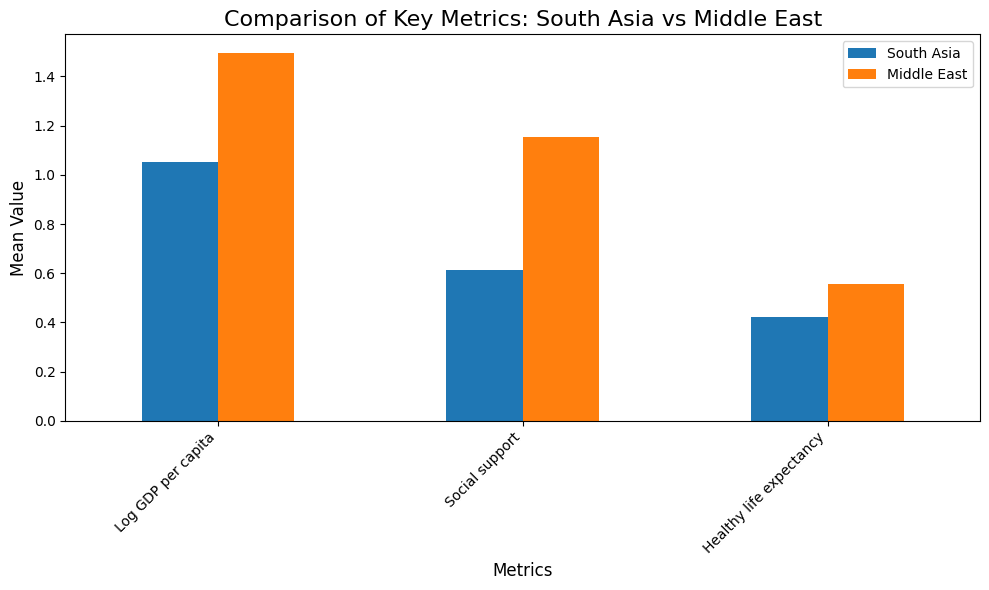

In [71]:

# Step 1: Calculate the mean for the key metrics in both regions
south_asia_means = south_asia_dataset[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
middle_east_means = middle_east_dataset[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

# Step 2: Combine the results into one DataFrame for easy plotting
metrics_comparison = pd.DataFrame({
    'South Asia': south_asia_means,
    'Middle East': middle_east_means
})

# Step 3: Plot the grouped bar chart
metrics_comparison.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Comparison of Key Metrics: South Asia vs Middle East', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


The metric that shows the largest disparity between the two regions is likely GDP per Capita, with the Middle East region generally having much higher values compared to South Asia. This disparity arises due to the economic wealth in Middle Eastern countries, particularly oil-rich nations like Saudi Arabia, Qatar, and the United Arab Emirates, which significantly contribute to higher GDP per capita in the region.

4.	Happiness Disparity:

In [72]:
# Calculate the range (max - min) and coefficient of variation (CV) for Score in South Asia and Middle East

# Range
south_asia_range = south_asia_dataset['score'].max() - south_asia_dataset['score'].min()
middle_east_range = middle_east_dataset['score'].max() - middle_east_dataset['score'].min()

# Coefficient of Variation (CV)
south_asia_cv = (south_asia_dataset['score'].std() / south_asia_dataset['score'].mean()) * 100
middle_east_cv = (middle_east_dataset['score'].std() / middle_east_dataset['score'].mean()) * 100

# Display the results
print(f"South Asia - Range: {south_asia_range}, CV: {south_asia_cv:.2f}%")
print(f"Middle East - Range: {middle_east_range}, CV: {middle_east_cv:.2f}%")


South Asia - Range: 3.4370000000000003, CV: 30.21%
Middle East - Range: 4.634, CV: 28.94%


Although the Middle East has a higher range, South Asia exhibits greater variability in happiness as indicated by the higher coefficient of variation (CV). This suggests that happiness scores in South Asia are more dispersed relative to the average score, indicating a more uneven distribution of happiness.

5.	Correlation Analysis:

South Asia Correlations:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  
Middle East Correlations:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


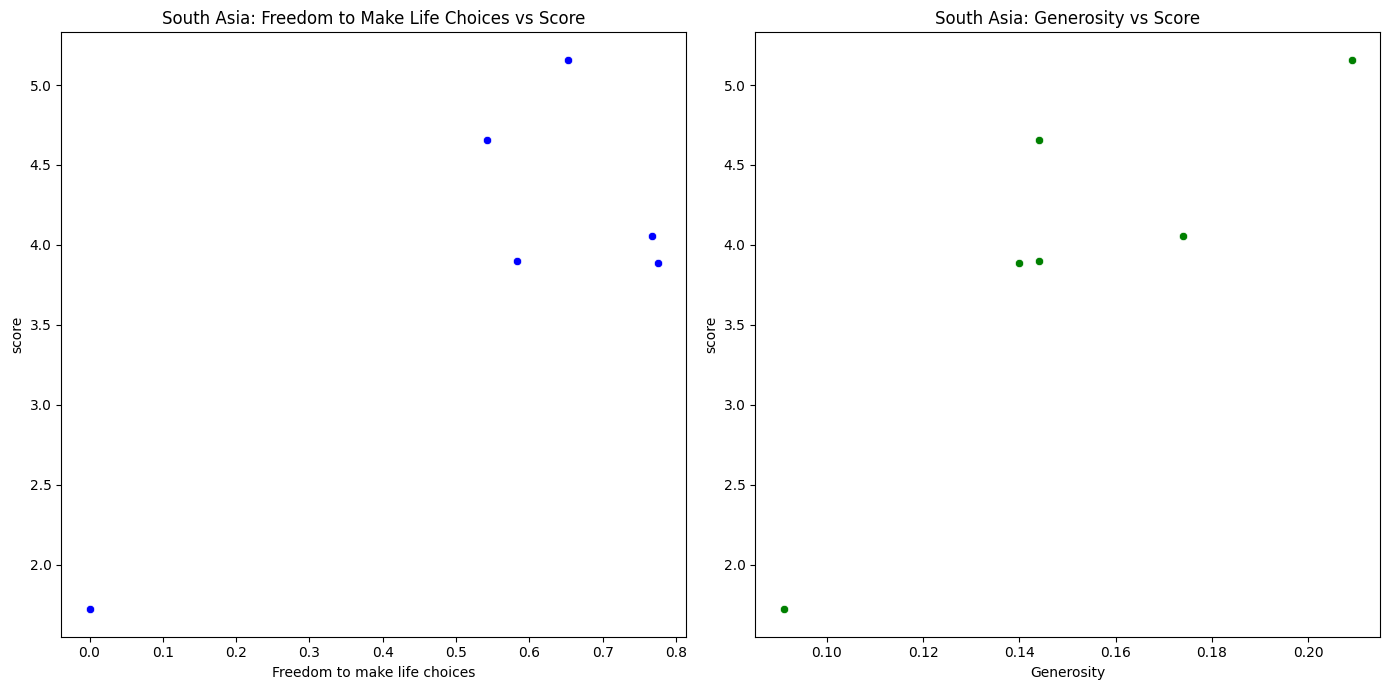

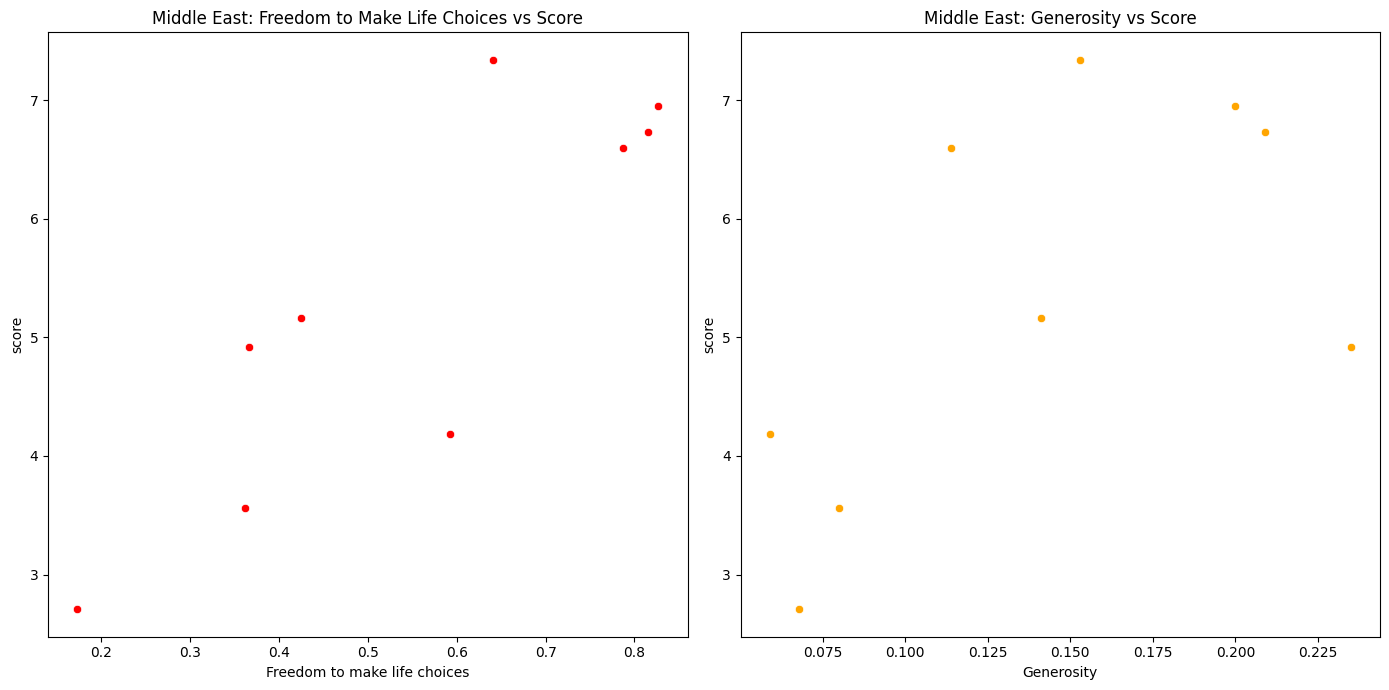

In [73]:

# Calculate Pearson correlation for South Asia
south_asia_corr = south_asia_dataset[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("South Asia Correlations:\n", south_asia_corr)

# Calculate Pearson correlation for Middle East
middle_east_corr = middle_east_dataset[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("Middle East Correlations:\n", middle_east_corr)

# Scatter plots for South Asia: Happiness Score vs Freedom to Make Life Choices and Generosity
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot for Freedom to Make Life Choices vs Score
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_dataset, ax=axs[0], color='blue')
axs[0].set_title('South Asia: Freedom to Make Life Choices vs Score')

# Scatter plot for Generosity vs Score
sns.scatterplot(x='Generosity', y='score', data=south_asia_dataset, ax=axs[1], color='green')
axs[1].set_title('South Asia: Generosity vs Score')

# Show the plots
plt.tight_layout()
plt.show()

# Scatter plots for Middle East: Happiness Score vs Freedom to Make Life Choices and Generosity
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot for Freedom to Make Life Choices vs Score
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_dataset, ax=axs[0], color='red')
axs[0].set_title('Middle East: Freedom to Make Life Choices vs Score')

# Scatter plot for Generosity vs Score
sns.scatterplot(x='Generosity', y='score', data=middle_east_dataset, ax=axs[1], color='orange')
axs[1].set_title('Middle East: Generosity vs Score')

# Show the plots
plt.tight_layout()
plt.show()


6.	Outlier Detection:

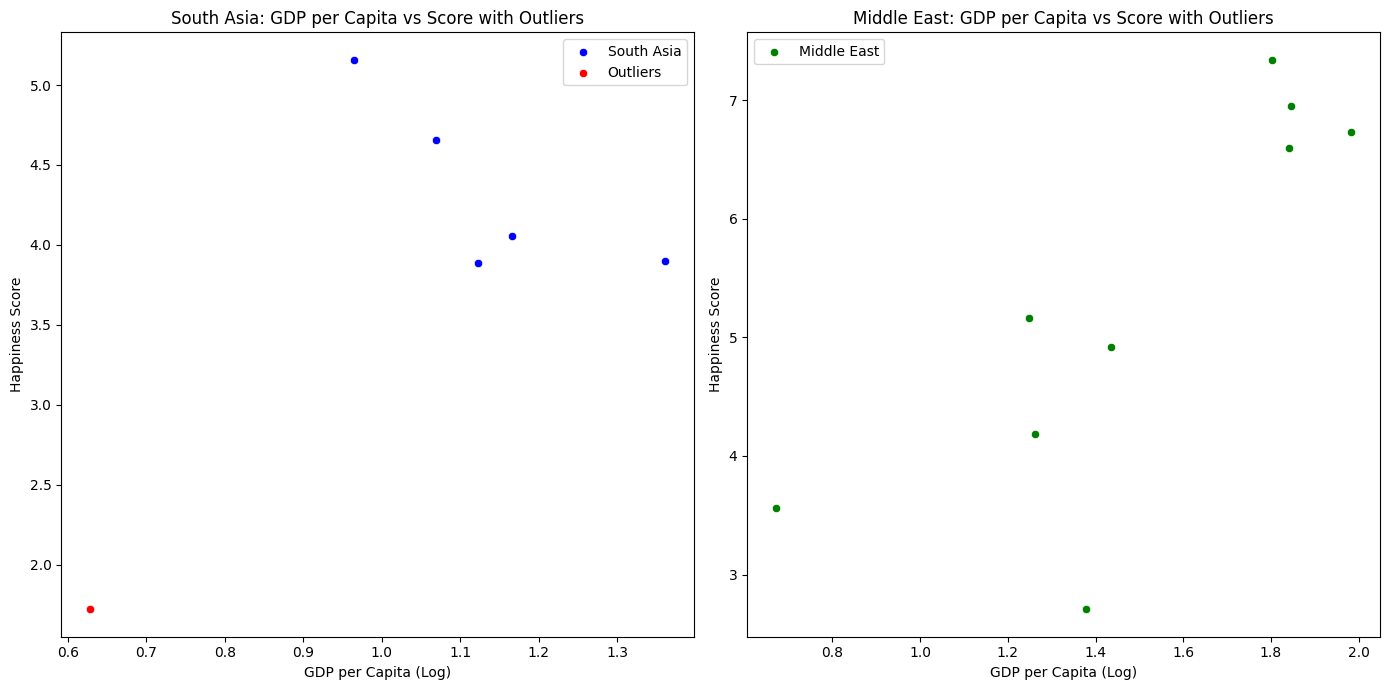

In [74]:

# Function to identify outliers based on IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identify outliers for South Asia region based on Score and GDP per Capita
south_asia_score_outliers, _, _ = identify_outliers(south_asia_dataset, 'score')
south_asia_gdp_outliers, _, _ = identify_outliers(south_asia_dataset, 'Log GDP per capita')

# Identify outliers for Middle East region based on Score and GDP per Capita
middle_east_score_outliers, _, _ = identify_outliers(middle_east_dataset, 'score')
middle_east_gdp_outliers, _, _ = identify_outliers(middle_east_dataset, 'Log GDP per capita')

# Combine outliers for both regions
outliers_south_asia = pd.concat([south_asia_score_outliers, south_asia_gdp_outliers]).drop_duplicates()
outliers_middle_east = pd.concat([middle_east_score_outliers, middle_east_gdp_outliers]).drop_duplicates()

# Plotting Outliers on Scatter Plot (GDP vs Score)
plt.figure(figsize=(14, 7))

# South Asia Outliers
plt.subplot(1, 2, 1)
sns.scatterplot(x=south_asia_dataset['Log GDP per capita'], y=south_asia_dataset['score'], color='blue', label='South Asia')
sns.scatterplot(x=outliers_south_asia['Log GDP per capita'], y=outliers_south_asia['score'], color='red', label='Outliers')
plt.title('South Asia: GDP per Capita vs Score with Outliers')
plt.xlabel('GDP per Capita (Log)')
plt.ylabel('Happiness Score')
plt.legend()

# Middle East Outliers
plt.subplot(1, 2, 2)
sns.scatterplot(x=middle_east_dataset['Log GDP per capita'], y=middle_east_dataset['score'], color='green', label='Middle East')
sns.scatterplot(x=outliers_middle_east['Log GDP per capita'], y=outliers_middle_east['score'], color='red', label='Outliers')
plt.title('Middle East: GDP per Capita vs Score with Outliers')
plt.xlabel('GDP per Capita (Log)')
plt.ylabel('Happiness Score')
plt.legend()

plt.tight_layout()
plt.show()


7. Visualization


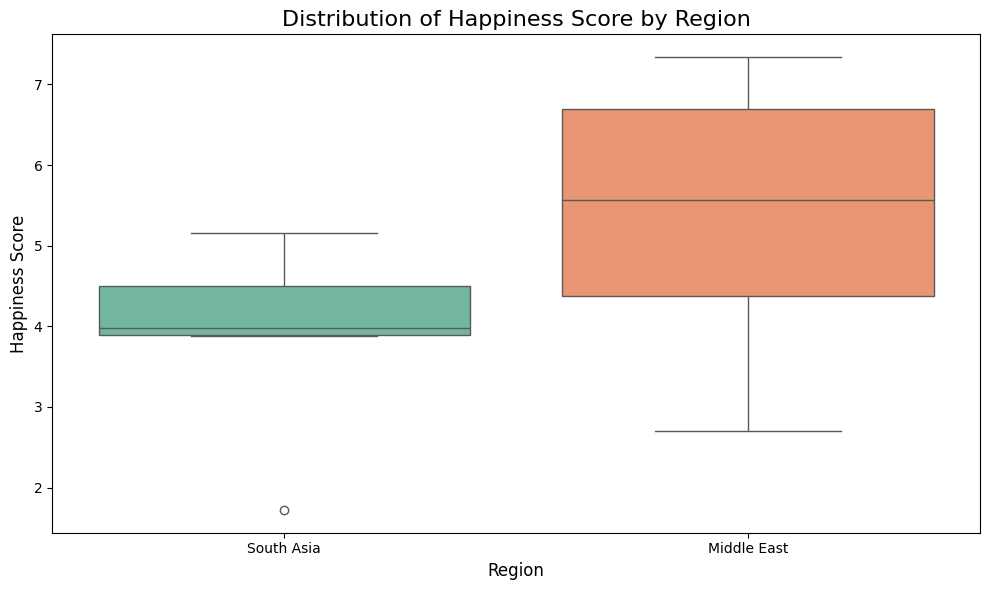

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use .loc to set values correctly in the DataFrame to avoid SettingWithCopyWarning
south_asia_dataset.loc[:, 'Region'] = 'South Asia'
middle_east_dataset.loc[:, 'Region'] = 'Middle East'

# Combine both datasets for comparison
combined_df = pd.concat([south_asia_dataset[['Country name', 'score', 'Region']],
                         middle_east_dataset[['Country name', 'score', 'Region']]])

# Create the boxplot with proper `hue` parameter
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df, palette="Set2", hue='Region')

# Adding title and labels
plt.title('Distribution of Happiness Score by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


The median represents the typical happiness score in each region. A higher median indicates generally higher scores in that region.

The distribution shape (IQR) shows variability: a wider box means more variation in scores, while a narrower box indicates consistency.

Outliers are points outside the whiskers, representing countries with significantly different happiness scores from the rest.






